In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split

df= pd.read_csv('breast-cancer-wisconsin.txt')
df.replace('?', -99999, inplace=True)
df.drop(['Id'], 1, inplace=True)

X= np.array(df.drop([' Class'], 1))
Y= np.array(df[' Class'])

Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, Y, test_size=0.2)
clf= svm.SVC()

clf.fit(Xtrain, Ytrain)
import pickle
with open('svm.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in= open('svm.pickle', 'rb')
clf= pickle.load(pickle_in)

accuracy= clf.score(Xtest, Ytest)

print('HI: ',accuracy)

HI:  0.9642857142857143


c:\users\lovish bml\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


hi
Hi
Optimized a step.
Optimized a step.
Optimized a step.


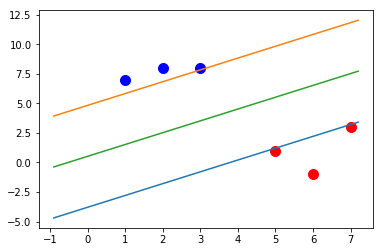

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

class SupportVector:
    def __init__(self, visualization=True):
        self.visualization= visualization
        self.colors={1:'r', -1:'b'}
        if self.visualization:
            self.fig= plt.figure()
            self.ax= self.fig.add_subplot(1, 1, 1)
    
    def fit(self, data):
        print('hi')
        self.data= data
        opt_dict={}
        
        transforms= [[1, 1], [-1, 1], [1, -1], [-1, -1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.maxfeature=max(all_data)
        self.minfeature=min(all_data)
        print("Hi")
        step_sizes={self.maxfeature * 0.1, 
                   self.maxfeature * 0.01,
                   self.maxfeature * 0.001}
        
        b_range_multiple = 5
        b_multiple=5
        
        latest_optimum= self.maxfeature*10
        
        for step in step_sizes:
            w= np.array([latest_optimum, latest_optimum])
            optimized= False
            
            while not optimized:
                for b in np.arange(-1*(self.maxfeature*b_range_multiple), self.maxfeature*b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t= w*transformation
                        found_option= True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot( w_t, xi) + b) >= 1:
                                    #print('not here')
                                    found_option= False
                                    break
                        if found_option:
                            #print('here')
                            opt_dict[np.linalg.norm(w_t)]=[w_t, b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                     w= w- step
                
            norms = sorted([n for n in opt_dict])
            
            newobject= opt_dict[norms[0]]
        
            self.w= newobject[0]
            self.b= newobject[1]
        
            latest_optimum= newobject[0][0] * step *2 
    
    def predict(self, features):
        classification= np.sign(np.dot(features, self.w) + b)
        
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c= self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1],s=100, color= self.colors[i]) for x in data_dict[i]] for i in data_dict]
                          
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v)/ w[1]
        
        datarange= [self.minfeature * 0.9, self.maxfeature * 0.9]
        hyp_x_min= datarange[0]
        hyp_x_max= datarange[1]
        
        pav1= hyperplane(hyp_x_min, self.w, self.b, 1)
        pav2= hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [pav1, pav2])
                          
        nsv1= hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2= hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])
                          
        db1= hyperplane(hyp_x_min, self.w, self.b, 0)
        db2= hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2])
                          
        

data_dict= {-1: np.array([[1, 7], [2, 8], [3, 8]]), 1:np.array([[5, 1], [6, -1], [7, 3]])}
svm= SupportVector()
svm.fit(data= data_dict)
svm.visualize()
                          